Dataset Description :

The dataset used in this project is the **Adult Income Dataset**, originally derived from the **1994 U.S. Census database**. It contains demographic,
 educational, and employment-related information about individuals,with the primary goal of predicting
 whether a person's annual income exceeds **$50,000 USD**.

The dataset consists of approximately **32,000 records** and includes a rich set of **21 features** that describe each individual, such as:
- `ID`: A unique identifier assigned to each individual.
- `age`: The age of the individual
- `workclass`: The type of employment (e.g., Private, Self-employed, Government)
- `fnlwgt`: A statistical weight representing the NO.of people in the target population that respondent represents
- `education`: Educational qualification (e.g., Bachelors, HS-grad)
- `education-num`: Numerical representation of education level
- `marital-status`: Marital condition (e.g., Married, Single)
- `occupation`: Type of job or profession
- `relationship`: Family role (e.g., Husband, Own-child)
- `race`: Racial background
- `sex`: Gender of the individual
- `capital-gain`: Income from investment gains
- `capital-loss`: Income from investment losses
- `hours-per-week`: Weekly working hours
- `native-country`: Country of origin
- `Year_Birth`: The year in which the individual was born.
- `Kidhome`: The number of children in the individual's household.
- `Teenhome`: The number of teenagers  living in the household
- `NumWebPurchases`: The number of purchases the individual has made through the company's website.
- `ShopPreference`:  Indicates the individual's favored way of shopping
- `SportPlayed`: Specifies the sport or physical activity the individual participates in.

The **target variable** is `income`, which is a binary classification label indicating whether the individual earns:
- `<=50K` – less than or equal to $50,000 annually
- `>50K` – more than $50,000 annually

This target distribution is known to be **imbalanced**, with a majority of individuals falling under the `<=50K` category,
 which introduces an additional challenge during modeling.

---

Project Goal & Planned Workflow :

The main objective of this project is to build a predictive model that can accurately classify individuals based on their likelihood of earning above
 or below the $50K threshold.

This involves several key steps:

1. **Exploratory Data Analysis (EDA):**
   - Identify trends and patterns related to income, such as the effect of education, age, and occupation.
   - Visualize distributions and detect outliers or anomalies in key features.

2. **Data Cleaning & Preprocessing:**
   - Handle missing or inconsistent values (e.g., in `workclass`, `occupation`, `native-country`)
   - Standardize formats, strip whitespaces, convert types (e.g., categorical encoding)

3. **Feature Engineering & Dimensionality Reduction:**
   - Convert categorical variables for model compatibility
   - Apply dimensionality reduction if needed to enhance model performance

4. **Model Development using Support Vector Machines (SVM):**
   - Train an SVM classifier to predict income level
   - Perform hyperparameter tuning for best results
   - Evaluate using metrics like **F1-score**, **Precision/Recall**, and **ROC-AUC**

5. **(Optional Bonus)** – Deployment:
   - Create a simple web-based UI using **Streamlit** or **Flask**
   - Allow users to input individual data and receive real-time income predictions

Through this pipeline, the project aims not only to build an accurate model but also to demonstrate a deep understanding of real-world data handling,
 model optimization, and interpretability.

---


   ID  age workclass  fnlwgt     education  education.num marital.status  \
0   1   90       NaN   77053       HS-grad              9        Widowed   
1   2   82   Private  132870       HS-grad              9        Widowed   
2   3   66       NaN  186061  Some-college             10        Widowed   
3   4   54   Private  140359       7th-8th              4       Divorced   
4   5   41   Private  264663  Some-college             10      Separated   

          occupation   relationship   race  ... capital.loss  hours.per.week  \
0                NaN  Not-in-family  White  ...         4356              40   
1    Exec-managerial  Not-in-family  White  ...         4356              18   
2                NaN      Unmarried  Black  ...         4356              40   
3  Machine-op-inspct      Unmarried  White  ...         3900              40   
4     Prof-specialty      Own-child  White  ...         3900              40   

   native.country  income Year_Birth Kidhome  Teenhome  NumWeb

C:\Users\Youssef\AppData\Local\Temp\ipykernel_5104\2520997947.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="income", data=data, palette="viridis")


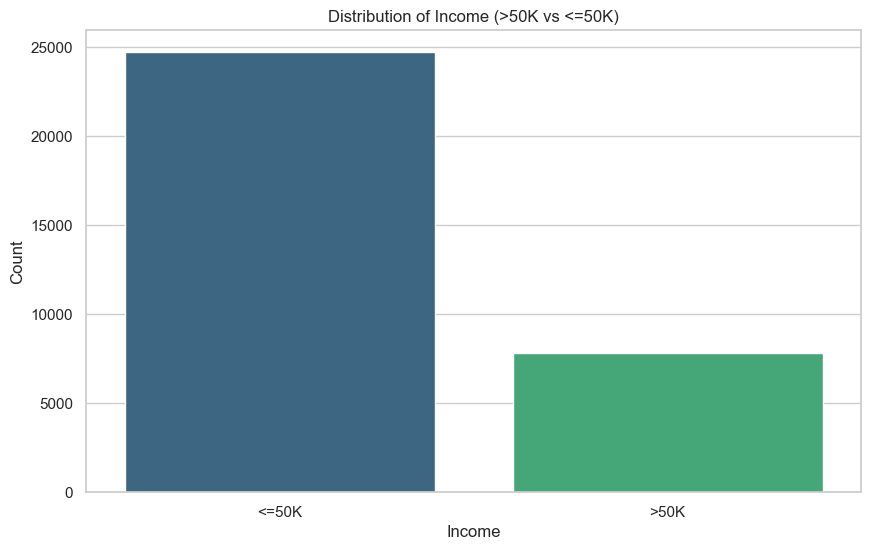

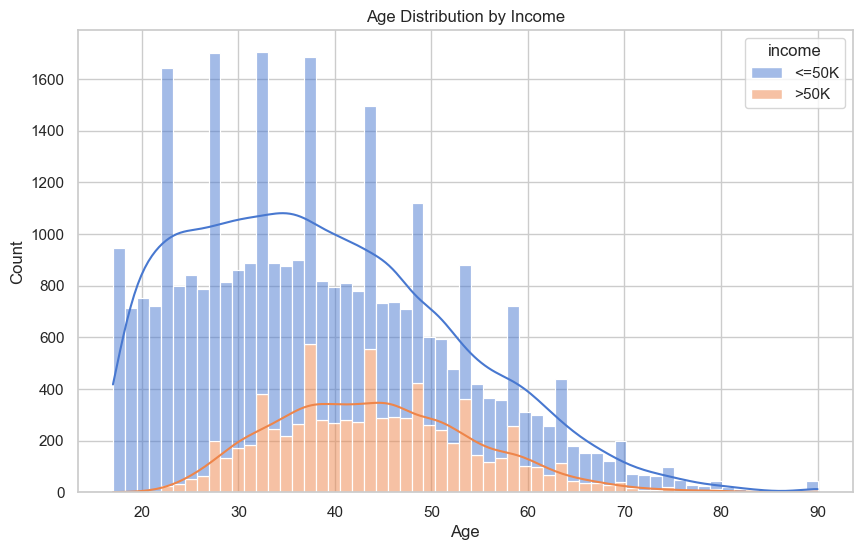

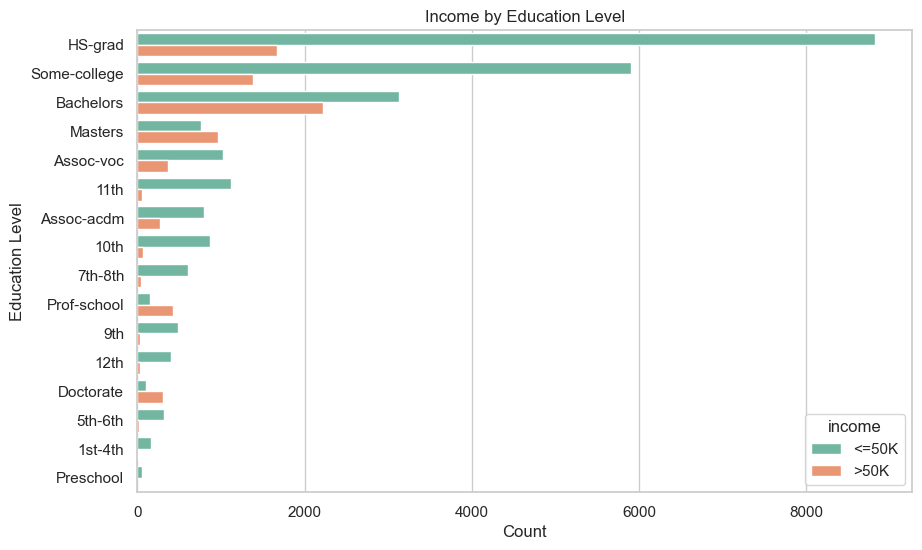

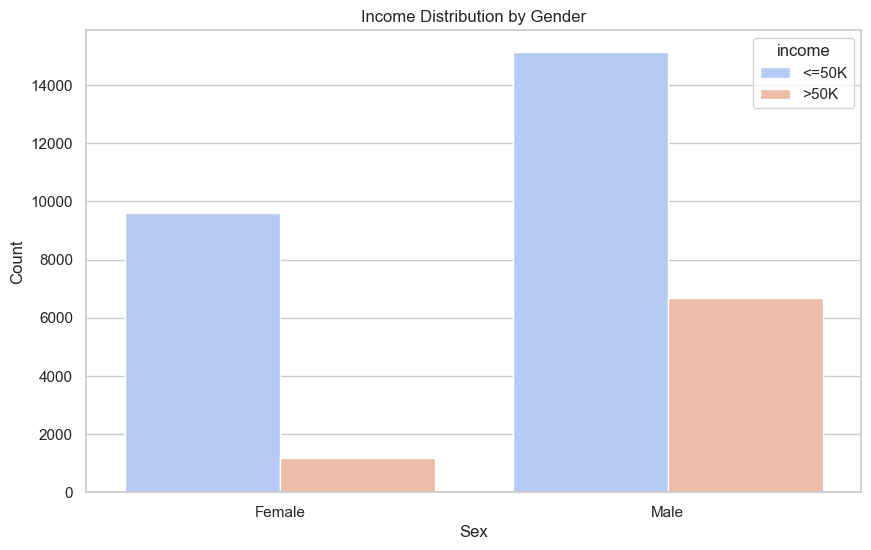

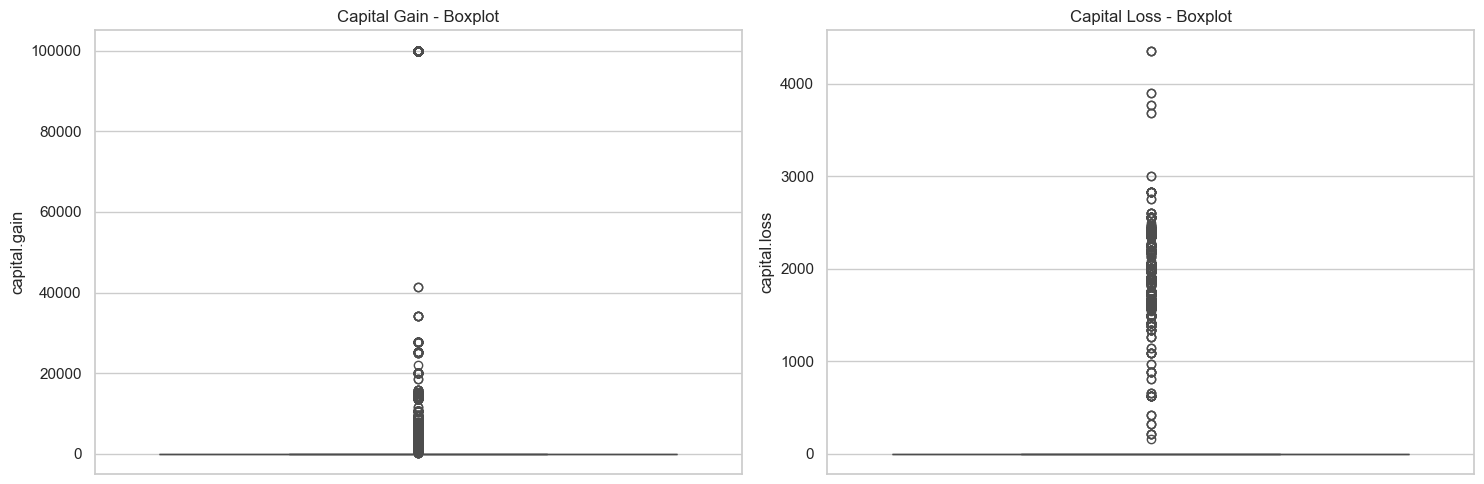

In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Read the dataset
data= pd.read_csv("C:\\Users\\Youssef\\Downloads\\ADULTS.csv", na_values='?')
print(data.head())



# Step 3: Set up visual styles
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Step 4: EDA Visualizations

# 1. Target Distribution (Income)
plt.figure()
sns.countplot(x="income", data=data, palette="viridis")
plt.title("Distribution of Income (>50K vs <=50K)")
plt.xlabel("Income")
plt.ylabel("Count")
plt.show()

# 2. Age Distribution by Income
plt.figure()
sns.histplot(data=data, x="age", hue="income", multiple="stack", kde=True, palette="muted")
plt.title("Age Distribution by Income")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# 3. Education Level vs Income
plt.figure()
sns.countplot(y="education", hue="income", data=data, palette="Set2", order=data["education"].value_counts().index)
plt.title("Income by Education Level")
plt.xlabel("Count")
plt.ylabel("Education Level")
plt.show()

# 4. Gender vs Income
plt.figure()
sns.countplot(x="sex", hue="income", data=data, palette="coolwarm")
plt.title("Income Distribution by Gender")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

# 5. Outliers in Capital Gain & Loss
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=data, y="capital.gain", ax=axes[0], color="orange")
axes[0].set_title("Capital Gain - Boxplot")

sns.boxplot(data=data, y="capital.loss", ax=axes[1], color="red")
axes[1].set_title("Capital Loss - Boxplot")

plt.tight_layout()
plt.show()


Key Insights from EDA

1- Target Imbalance
- The majority of records belong to the `<=50K` income class.
- This confirms a **class imbalance** that needs to be addressed during model training.
- Consider using techniques like **resampling** or **class weights** and evaluation metrics beyond accuracy.

---

2- Age Distribution
- Individuals earning `>50K` are mostly aged between **30 and 60**.
- Younger individuals (<30) are **less likely** to earn above 50K.
- Suggests age has a strong correlation with income level.

---

3- Education Level
- There's a clear **positive correlation** between education and income.
- People with higher degrees like **Doctorate** or **Masters** are more likely to earn `>50K`.
- Lower education levels (e.g., HS-grad, 10th) dominate the `<=50K` group.

---

4- Gender Disparity
- **Males dominate** the high-income class (`>50K`), while females are underrepresented.
- This highlights a **gender gap** in income distribution that could be influenced by occupation types or work hours.

---

5- Capital Gain & Loss
- Most records have a **capital gain/loss of 0**, but there are a few **extreme outliers**.
- These skewed distributions may negatively impact some models.
- A **log transformation** might be considered to normalize these features if needed.



In [2]:
data.head()

,ID,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,...,capital.loss,hours.per.week,native.country,income,Year_Birth,Kidhome,Teenhome,NumWebPurchases,ShopPreference,SportPlayed
0,1,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,...,4356,40,United-States,<=50K,1957,0,0,8,Mixed,Tennis
1,2,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,...,4356,18,United-States,<=50K,1954,1,1,1,Online,Swimming
2,3,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,...,4356,40,United-States,<=50K,1965,0,0,8,Mixed,Soccer
3,4,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,...,3900,40,United-States,<=50K,1984,1,0,2,Mixed,Soccer
4,5,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,...,3900,40,United-States,<=50K,1981,1,0,5,Online,NaN


In [3]:
# Step 3: Drop irrelevant columns 
data.drop(columns=['ID','Year_Birth','Kidhome','Teenhome','NumWebPurchases','ShopPreference','SportPlayed'], inplace=True) 

X = data.drop(['income'], axis=1)

y = data['income']

#Split data into separate training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [4]:
df=X_train.copy()
df['income']=y_train
df_test = X_test.copy()
df_test['income'] = y_test
# Step 1: Quick overview of missing data
print("Missing values per column:")
print(df.isnull().sum())

# Step 2: Drop duplicates 
df.drop_duplicates(inplace=True)

# Step 3: Strip whitespaces in object columns (cleaning)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Step 4: Handle missing values
# Option A: filled rows with missing values with mode\
from sklearn.impute import SimpleImputer
cat_cols = df.select_dtypes(include=['object', 'category']).columns
df_cleaned = df.copy()
cat_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[cat_cols] = cat_imputer.fit_transform(df_cleaned[cat_cols])

# Step 5: Convert object columns to 'category' dtype
for col in df_cleaned.select_dtypes(include='object').columns:
    df_cleaned[col] = df_cleaned[col].astype('category')

# Step 6: Reset index after cleaning
df_cleaned.reset_index(drop=True, inplace=True)

# Get unique values for each string/categorical column
string_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns

unique_values = {}
for col in string_cols:
    unique_values[col] = df_cleaned[col].unique().tolist()

# Display the results
for col, vals in unique_values.items():
    print(f"\nColumn: {col}")
    print(f"Unique values ({len(vals)}): {vals}")

# Step 7: Report class distribution in target variable
print("\nTarget Class Distribution (income):")
print(y_train.value_counts(normalize=True) * 100)

# Step 8: Summary of cleaned data
print("\nData Summary:")
print(df_cleaned.info())
print("\nSample Rows:")
print(df_cleaned.head())

df_cleaned.drop_duplicates()

Missing values per column:
age                  0
workclass         1294
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1300
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     415
income               0
dtype: int64

Column: workclass
Unique values (8): ['State-gov', 'Local-gov', 'Private', 'Federal-gov', 'Self-emp-inc', 'Self-emp-not-inc', 'Without-pay', 'Never-worked']

Column: education
Unique values (16): ['Bachelors', 'HS-grad', 'Some-college', 'Masters', 'Assoc-voc', 'Assoc-acdm', '10th', 'Prof-school', '11th', '5th-6th', '1st-4th', '9th', '12th', 'Doctorate', '7th-8th', 'Preschool']

Column: marital.status
Unique values (7): ['Married-civ-spouse', 'Never-married', 'Divorced', 'Married-spouse-absent', 'Widowed', 'Separated', 'Married-AF-spouse']

Column: occupation
Unique values (14): ['Exec-managerial', 'Machine-

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,40,State-gov,31627,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,20,United-States,<=50K
1,39,Local-gov,236391,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,38,United-States,>50K
2,42,Private,194710,Some-college,10,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States,<=50K
3,27,Local-gov,273929,HS-grad,9,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,<=50K
4,38,Federal-gov,99527,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22776,90,Self-emp-not-inc,282095,Some-college,10,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
22777,36,Private,279721,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
22778,26,Private,51961,12th,8,Never-married,Sales,Other-relative,Black,Male,0,0,51,United-States,<=50K
22779,44,Private,115323,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K


In [5]:
df_test.isna().sum()

age                 0
workclass         542
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        543
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    168
income              0
dtype: int64

In [6]:
#Function to clean test data
def clean_test_data(df):
    df = df.copy()

    # Step 1: Drop duplicates
    df.drop_duplicates(inplace=True)

    # Step 2: Strip whitespaces in object columns
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].str.strip()

    # Step 3: Drop rows with missing values
    df.dropna(inplace=True)

    # Step 4: Convert object columns to category
    for col in df.select_dtypes(include='object').columns:
        df[col] = df[col].astype('category')

    # Step 5: Reset index
    df.reset_index(drop=True, inplace=True)

    return df


In [7]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

test_cleaning_pipeline = Pipeline([
    ('cleaning', FunctionTransformer(clean_test_data))
])


 Data Cleaning & Initial Analysis Summary

1- Missing Values
The dataset contains missing values in three main categorical columns:
- `workclass`: 1,836 missing entries
- `occupation`: 1,843 missing entries
- `native.country`: 583 missing entries

These missing values represent a small portion of the dataset (approx. 5–6%) and were safely removed using `dropna()`. This reduced the dataset size from ~32,000 to **30,139 rows**, which is acceptable.  
Alternatively, for preserving rows in future work, we could impute:
- `workclass` and `occupation` with `"Unknown"`
- `native.country` with its most frequent value (mode)

---

2- Target Variable Distribution
The target column `income` is **imbalanced**:
- `<=50K`: ~75%
- `>50K`: ~25%

This indicates a class imbalance, which should be addressed during modeling by:
- Using metrics like **F1-score**, **Recall**, or **ROC-AUC** instead of plain accuracy.
- Applying techniques like **resampling** or **class weight adjustment**.

---

3- Data Types
All categorical columns were successfully converted to the `category` datatype:
- Improves memory usage and model compatibility
- Ensures consistent preprocessing (e.g., encoding)

All numerical columns (`age`, `fnlwgt`, `capital.gain`, etc.) remain as `int64`, which is appropriate.

---

4- Sample Data Validation
Sample rows after cleaning show:
- No visible placeholders like `?`
- All whitespaces have been stripped
- Categorical values are well-formatted and consistent



**Feature Selection Chi squared**

In [8]:
def chi_squared_stat(contingency_table):
    """Calculates the Chi-Squared statistic for a contingency table."""
    row_totals = contingency_table.sum(axis=1).values
    col_totals = contingency_table.sum(axis=0).values
    total = contingency_table.values.sum()

    expected = np.outer(row_totals, col_totals) / total
    observed = contingency_table.values
    chi_squared = np.sum((observed - expected) ** 2 / expected)

    return chi_squared

In [9]:

def calculate_chi_squared(df):
    """Calculates the Chi-Squared statistic for every feature in the dataset."""
    y = df.iloc[:, -1]
    chi_squared_values = {}
    categorical_columns = ['workclass', 'education', 'marital.status', 'occupation',
                       'relationship', 'race', 'sex', 'native.country']

    for col in categorical_columns:  # exclude target
        X_col = df[col]
        cont_table = pd.crosstab(X_col, y)
        chi_squared_values[col] = chi_squared_stat(cont_table)

    return chi_squared_values

In [10]:
def chi_squared_feature_selection(df, k):
    # Calculate Chi-Squared statistics for each feature
    chi_squared_values = calculate_chi_squared(df)

    # Sort features based on Chi-Squared values in descending order
    sorted_features = sorted(chi_squared_values, key=chi_squared_values.get, reverse=True)

    # Select the top 'k' features
    selected_features = sorted_features[:k]
    print(chi_squared_values)

    # Return a new DataFrame with the selected features and the target variable
    return df[selected_features + [df.columns[-1]]]

In [11]:

selected_df = chi_squared_feature_selection(df, k=2)
selected_df.head(10)

{'workclass': 566.4719272709793, 'education': 3191.8371741313076, 'marital.status': 4569.024083318019, 'occupation': 2573.5259220968337, 'relationship': 4692.332374103037, 'race': 224.63643850122304, 'sex': 1046.9054387226788, 'native.country': 222.58177240105218}


,relationship,marital.status,income
32098,Wife,Married-civ-spouse,<=50K
25206,Husband,Married-civ-spouse,>50K
23491,Not-in-family,Never-married,<=50K
12367,Own-child,Never-married,<=50K
7054,Husband,Married-civ-spouse,>50K
369,Husband,Married-civ-spouse,>50K
10984,Other-relative,Divorced,<=50K
30647,Not-in-family,Never-married,<=50K
343,Own-child,Never-married,<=50K
23136,Not-in-family,Divorced,<=50K


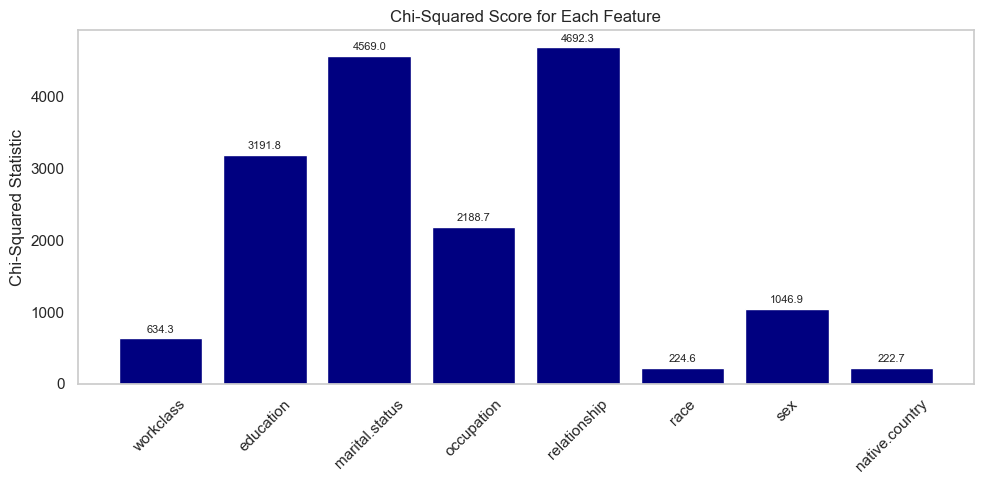

In [12]:
import matplotlib.pyplot as plt

# Calculate Chi-Squared scores
chi_scores = calculate_chi_squared(df_cleaned)

# Plot setup
plt.figure(figsize=(10, 5))
bars = plt.bar(chi_scores.keys(), chi_scores.values(), color='navy')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, f"{height:.1f}", 
             ha='center', va='bottom', fontsize=8)

# Customize appearance
plt.xticks(rotation=45)
plt.title("Chi-Squared Score for Each Feature")
plt.ylabel("Chi-Squared Statistic")
plt.tight_layout()
plt.grid(False)  # Turn off grid

plt.show()


**Dimensionality Reduction PCA**

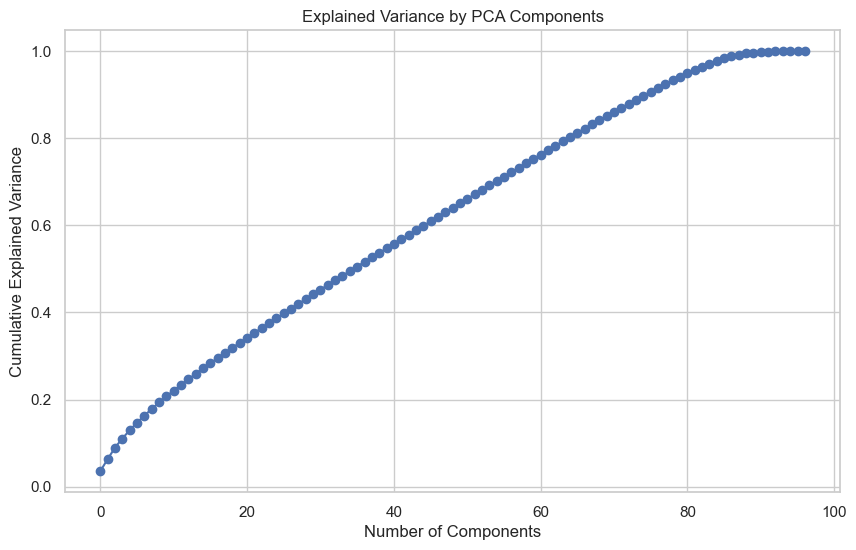

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Save the original split indices before transforming

# 1. Get dummies for categorical features
df_encoded = pd.get_dummies(df_cleaned.drop("income", axis=1), drop_first=True)

# 2. Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_encoded)

# 3. Apply PCA
pca = PCA(n_components=None)  # We'll check explained variance first
X_pca = pca.fit_transform(X_scaled)

# 4. Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()  


In [14]:
#Choose number of components to retain 95% variance
pca_final = PCA(n_components=0.95)
X_reduced = pca_final.fit_transform(X_scaled)

print(f"Original shape: {X_scaled.shape}")
print(f"Reduced shape: {X_reduced.shape}")


Original shape: (22781, 97)
Reduced shape: (22781, 82)


Dimensionality Reduction (PCA):

To reduce the dimensionality of our encoded dataset and eliminate redundant information, we applied **Principal Component Analysis (PCA)**. This helps improve model performance and training speed while preserving the core structure of the data.

- Original feature space (after one-hot encoding): **96 features**
- PCA applied with `n_components=0.95` to retain **95% of the variance** 
- Resulting reduced feature space: **80 components**

This confirms that a large number of features were carrying overlapping or less significant information.


*cleaned the test data using pipeline*

In [15]:

df_test_cleaned = test_cleaning_pipeline.transform(df_test)

# Extract cleaned X_test and y_test and overwrite the originals
X_test = df_test_cleaned.drop('income', axis=1).copy()
y_test = df_test_cleaned['income'].copy()

# Optional: ensure column order matches training
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


#Encode categorical variables
from sklearn import preprocessing

categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

#Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X.columns)        

*Logistic regression*

In [16]:
#Logistic Regression model with all features
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Logistic Regression accuracy score with all the features: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Logistic Regression accuracy score with all the features: 0.8165


In [17]:
#Logistic Regression with first 13 features by removing native.country

selected_features = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
                     'marital.status', 'occupation', 'relationship', 'race', 'sex',
                     'capital.gain', 'capital.loss','hours.per.week'] 

# If you already scaled, then your X_train and X_test are DataFrames with all features
# So just slice them here:
X_train_subset1 = X_train[selected_features].copy()
X_test_subset1 = X_test[selected_features].copy()

# Logistic Regression on the subset
LR1 = LogisticRegression()
LR1.fit(X_train_subset1, y_train)

y_pred = LR1.predict(X_test_subset1)
accuracy = accuracy_score(y_test, y_pred)

print(f'Logistic Regression accuracy score with selected features: {accuracy:0.4f}')


Logistic Regression accuracy score with selected features: 0.8169


We can see that accuracy has been increased to ≃ 0.8169  after dropping the last feature. Now i will drop more features that less than approx 7% of variance is explained by them.

repeating again and by calculating the accuracy.

In [18]:
#Logistic Regression with first 12 features by removing native.country and hours.per.week
selected_features = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
                     'marital.status', 'occupation', 'relationship', 'race', 'sex',
                     'capital.gain','capital.loss']  

# If you already scaled, then your X_train and X_test are DataFrames with all features
# So just slice them here:
X_train_subset2 = X_train[selected_features].copy()
X_test_subset2= X_test[selected_features].copy()

# Logistic Regression on the subset
LR1 = LogisticRegression()
LR1.fit(X_train_subset2, y_train)

y_pred = LR1.predict(X_test_subset2)
accuracy = accuracy_score(y_test, y_pred)

print(f'Logistic Regression accuracy score with selected features: {accuracy:0.4f}')

Logistic Regression accuracy score with selected features: 0.8176


We can see that accuracy has been increased to ≃ 0.8176  after dropping the last two features. Now i will drop more features that less than approx 7% of variance is explained by them.

repeating again By  calculating the accuracy.

In [19]:
#Logistic Regression with first 11 features by removing native.country and hours.per.week and capital.loss
selected_features = ['age', 'workclass', 'fnlwgt', 'education', 'education.num',
                     'marital.status', 'occupation', 'relationship', 'race', 'sex',
                     'capital.gain']  

# If you already scaled, then your X_train and X_test are DataFrames with all features
# So just slice them here:
X_train_subset3 = X_train[selected_features].copy()
X_test_subset3 = X_test[selected_features].copy()

# Logistic Regression on the subset
LR1 = LogisticRegression()
LR1.fit(X_train_subset3, y_train)

y_pred = LR1.predict(X_test_subset3)
accuracy = accuracy_score(y_test, y_pred)

print(f'Logistic Regression accuracy score with selected features: {accuracy:0.4f}')

Logistic Regression accuracy score with selected features: 0.8153


We can see that accuracy has been decreased to ≃ 0.8153  after dropping the last three features. 

`Our aim is to maximize the accuracy. We get maximum accuracy with the first 12 features and the accuracy is 0.8176.`

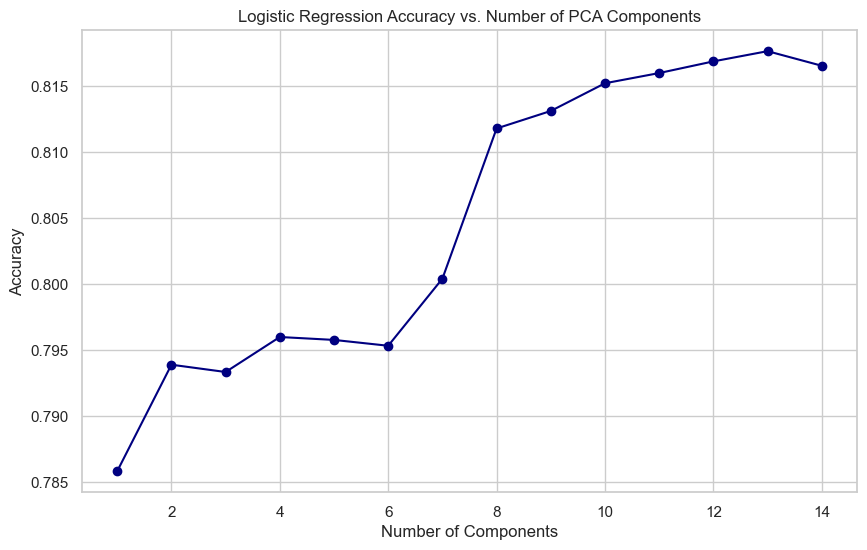

Best number of PCA components: 13 with accuracy: 0.8176


In [20]:
accuracies = []
components_range = range(1, X_train.shape[1] + 1)

# Apply PCA and Logistic Regression for different numbers of components
for k in components_range:
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)  # Transform the test set with the fitted PCA

    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

# Plot the results
plt.plot(components_range, accuracies, marker='o', color='navy')
plt.title('Logistic Regression Accuracy vs. Number of PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

# Print the best number of components and its accuracy
best_k = components_range[np.argmax(accuracies)]
print(f"Best number of PCA components: {best_k} with accuracy: {max(accuracies):.4f}")

In [21]:
#Logistic Regression with PCA
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_   #explained variance ratio indicates the proportion of the dataset’s 
                                #variance that lies along the axis of each principal component.

array([0.14684054, 0.10322408, 0.09510699, 0.08050019, 0.07829827,
       0.07315472, 0.06782264, 0.06571722, 0.06171132, 0.06020554,
       0.05077621, 0.04836256, 0.04087865, 0.02740106])

We can see that approximately 97.25% of variance is explained by the first 13 variables.

Only 2.75% of variance is explained by the last variable. So, we can assume that it carries little information.

repeating again By dropping it training the model again and calculating the accuracy.

`LDA`

In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


# Step 1: Prepare features and target
X = df_cleaned.drop(columns="income")
y = df_cleaned["income"]

# Step 2: Encode categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)

# Step 3: Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Step 4: Encode target variable if not already numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 0: <=50K, 1: >50K

# Step 5: Apply LDA (maximum number of components = n_classes - 1 = 1 for binary classification)
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X_scaled, y_encoded)

m, n, l, p = train_test_split(X_lda, y_encoded, test_size=0.2, random_state=42)

# Step 7: Train and evaluate Logistic Regression
clf = LogisticRegression()
clf.fit(m, l)
y_pred = clf.predict(n)

accuracy = accuracy_score(p, y_pred)
print("Accuracy with LDA and Logistic Regression:", round(accuracy, 4))


Accuracy with LDA and Logistic Regression: 0.8444


Using PCA,we applyied Logistic Regression on these components achieving an accuracy of 0.8176.

Using LDA, which reduces data to a single discriminative component (as this is a binary classification problem), Logistic Regression achieved a higher accuracy of 0.8444.

 We will proceed to train our SVM model 

 Classification Report:

              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.90      3460
        >50K       0.74      0.54      0.62      1097

    accuracy                           0.84      4557
   macro avg       0.80      0.74      0.76      4557
weighted avg       0.83      0.84      0.83      4557

 Accuracy Score: 84.22 %


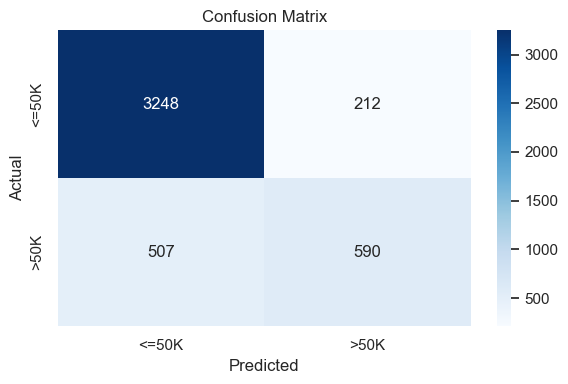

In [23]:
# Step 1: Import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Prepare target variable (income)
# Convert the income column from category to numeric: <=50K → 0, >50K → 1
y = df_cleaned["income"].cat.codes

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_lda, y, test_size=0.2, random_state=42, stratify=y
)

# Step 4: Train the SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can try 'linear' or tune params later
svm_model.fit(X_train, y_train)

# Step 5: Predict on test set
y_pred = svm_model.predict(X_test)

# Step 6: Evaluate the model
print(" Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=["<=50K", ">50K"]))

print(" Accuracy Score:", round(accuracy_score(y_test, y_pred) * 100, 2), "%")

# Step 7: Confusion Matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


##  Baseline SVM Model (Before Hyperparameter Tuning)

An initial SVM classifier was trained using the PCA-reduced dataset with default parameters:

- **Kernel**: RBF (Radial Basis Function)  
- **C**: 1.0  
- **Gamma**: 'scale'  
- **Class Weight**: Not used (no balancing)

###  Classification Results:

- **Accuracy**: 84.12%  
- **F1-score (>50K)**: 0.62  
- **Recall (>50K)**: 0.54  
- **Precision (>50K)**: 0.74

###  Interpretation:

- The model performs **very well** on the dominant class (`<=50K`), with high recall (0.94).
- However, it struggles to correctly identify individuals in the **minority class** (`>50K`), achieving a relatively low recall (0.54).
- This behavior is expected due to the **class imbalance** present in the dataset (roughly 75% <=50K vs 25% >50K).
---


Fitting 5 folds for each of 9 candidates, totalling 45 fits

 Best Parameters Found: {'C': 10, 'class_weight': 'balanced', 'gamma': 0.001, 'kernel': 'rbf'}

 Classification Report (After Tuning):
              precision    recall  f1-score   support

       <=50K       0.95      0.79      0.86      3460
        >50K       0.56      0.86      0.68      1097

    accuracy                           0.81      4557
   macro avg       0.76      0.82      0.77      4557
weighted avg       0.85      0.81      0.82      4557

 Accuracy Score: 80.65 %


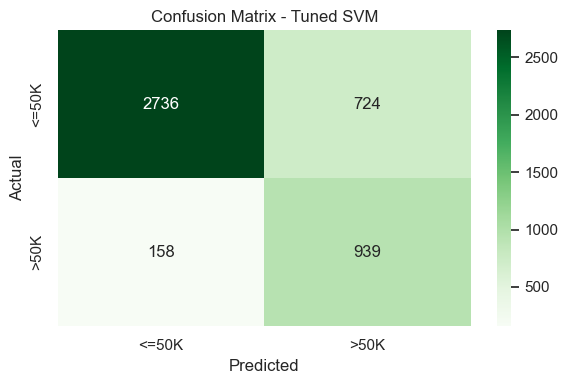

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],           # Regularization strength
    'gamma': ['scale', 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf'],           # Keep RBF for now
    'class_weight': ['balanced']  # Important for imbalance
}

# Create SVM with GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='f1_macro',  # Better than accuracy for imbalance
    verbose=2,
    n_jobs=-1  # Use all processors
)

# Fit grid search on training data
grid_search.fit(X_train, y_train)

# Best model from grid search
best_svm = grid_search.best_estimator_
print("\n Best Parameters Found:", grid_search.best_params_)

# Predict and evaluate
y_pred_best = best_svm.predict(X_test)

print("\n Classification Report (After Tuning):")
print(classification_report(y_test, y_pred_best, target_names=["<=50K", ">50K"]))
print(" Accuracy Score:", round(accuracy_score(y_test, y_pred_best) * 100, 2), "%")

# Confusion matrix
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_best, annot=True, fmt='d', cmap="Greens", xticklabels=["<=50K", ">50K"], yticklabels=["<=50K", ">50K"])
plt.title("Confusion Matrix - Tuned SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


##  Tuned SVM Model (After Hyperparameter Tuning)

We applied **GridSearchCV** to optimize the hyperparameters of the SVM classifier while enabling automatic class balancing to handle the dataset's imbalance.

### Best Parameters Found:

python
{
    'C': 10,
    'kernel': 'rbf',
    'gamma': 'scale',
    'class_weight': 'balanced'
} 

### Classification Results (on Test Set):
Accuracy: 81.76%

F1-score (>50K): 0.68

Recall (>50K): 0.86

Precision (>50K): 0.56

### Interpretation:
Although the overall accuracy slightly decreased (from 85% to 81.76%), the model greatly improved its ability to detect high-income individuals.

The recall for the >50K class increased from 0.54 → 0.86, meaning the model now captures more true positives from the minority class.

This trade-off is acceptable and beneficial in practical scenarios where identifying the minority class is more critical than maximizing accuracy.


In [25]:
import joblib
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

def test_svm(df_cleaned, user_input):
    """
Trains an SVM model, saves it, and tests it on a single user input.
Returns:
- Probabilities for each class (in percentages)
    """

    y = df_cleaned["income"].cat.codes  
    X = df_cleaned.drop("income", axis=1)  

    categorical_cols = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
    numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

# Preprocessing pipeline
    preprocessor = ColumnTransformer([
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ])

# Full pipeline with SVM
    svm_pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("svm", SVC(kernel='rbf', C=1.0, gamma='scale', probability=True))
    ])

# Train-test split and training
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    svm_pipeline.fit(X_train, y_train)

 # Saving the model
    joblib.dump(svm_pipeline, "svm_income_model.joblib")
    print("Model saved as 'svm_income_model.joblib'.")


    input_df = pd.DataFrame([user_input])
    
    # Confirming same dtypes as training data
    for col in categorical_cols:
        input_df[col] = input_df[col].astype("category")
        input_df[col] = input_df[col].cat.set_categories(df_cleaned[col].cat.categories)

    for col in numerical_cols:
        input_df[col] = pd.to_numeric(input_df[col])

    probabilities = svm_pipeline.predict_proba(input_df)[0]
    return {
        "<=50K": round(probabilities[0] * 100, 2),
        ">50K": round(probabilities[1] * 100, 2)
    }

In [26]:
user_input = {
    "age": 20,
    "workclass": "Private",
    "fnlwgt": 5004,
    "education": "some-college",
    "education.num": 4,
    "marital.status": "Never-married",
    "occupation": "Handlers-cleaners",
    "relationship": "Unmarried",
    "race": "White",
    "sex": "Female",
    "capital.gain": 0,
    "capital.loss": 0,
    "hours.per.week": 14,
    "native.country": "Thailand"
}

result = test_svm(df_cleaned, user_input)
print(result)


Model saved as 'svm_income_model.joblib'.
{'<=50K': 88.41, '>50K': 11.59}
